# Assignment is at the bottom! 

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10 # changes figure sizes of jupyter


from sklearn.linear_model import LogisticRegression as Model

In [3]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

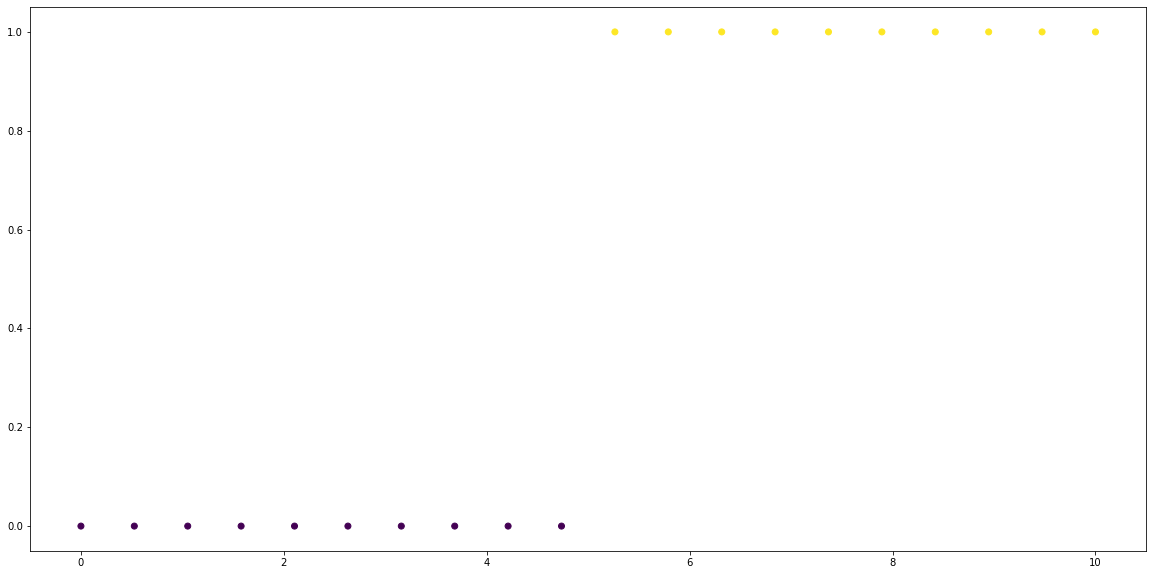

In [4]:
plt.scatter(x, y, c = y) # c changes colour of points based on what class they are in

In [8]:
model = LogisticRegression() # substantiate the model

In [9]:
model.fit(x.reshape(-1, 1), y) # fit the model (need to reshape)

LogisticRegression()

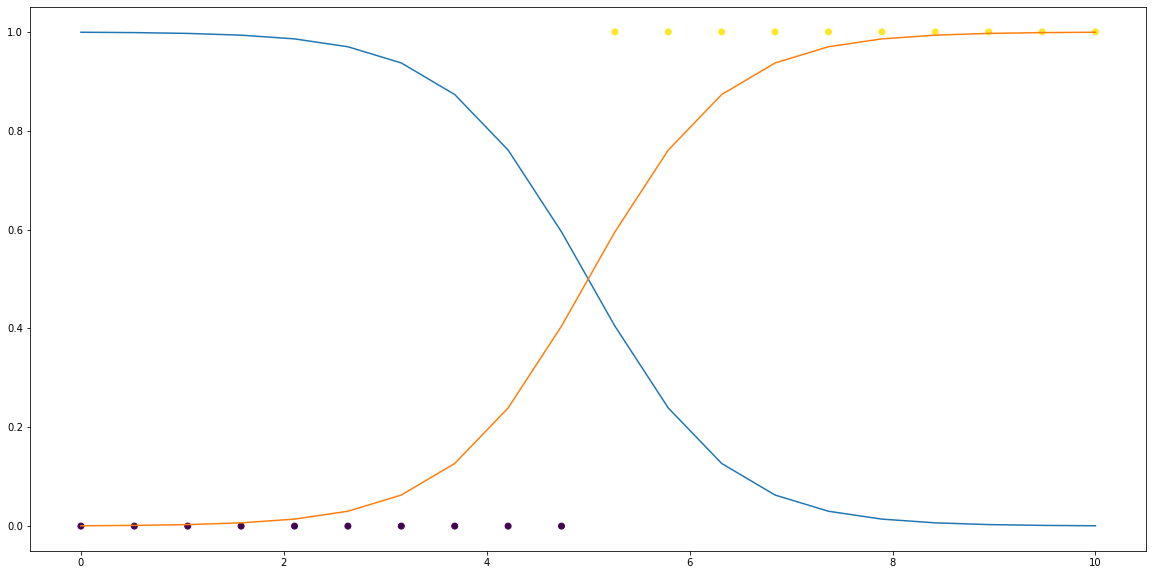

In [11]:
plt.scatter(x,y, c = y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

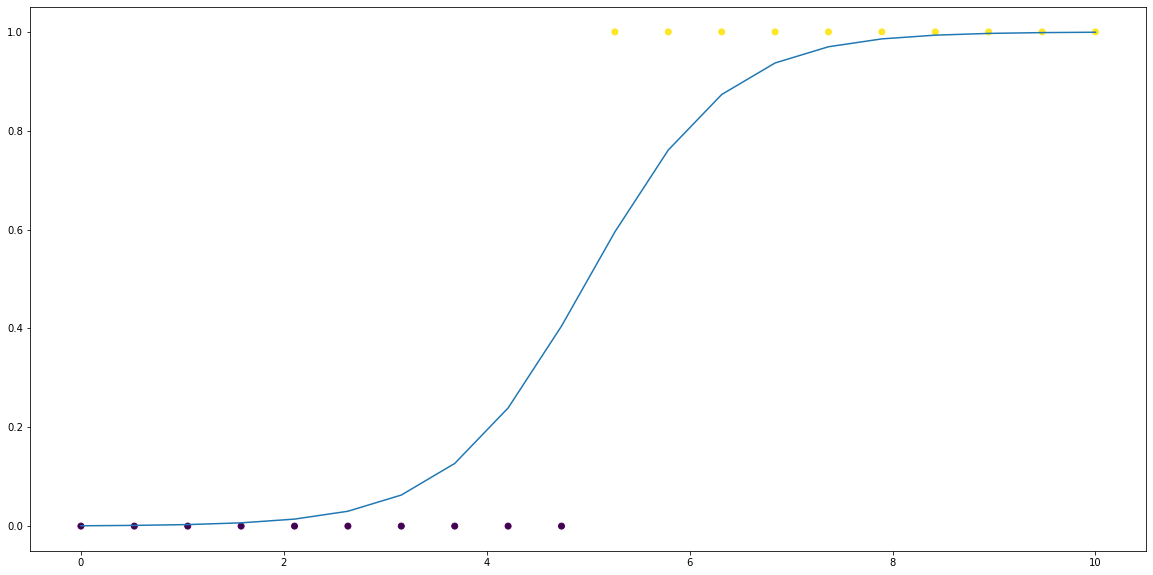

In [10]:
plt.scatter(x,y, c = y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1]) # we only care about one column
# curve below shows predictions of anything above 0.5 is a class 1 and anything before is a class 0

In [12]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

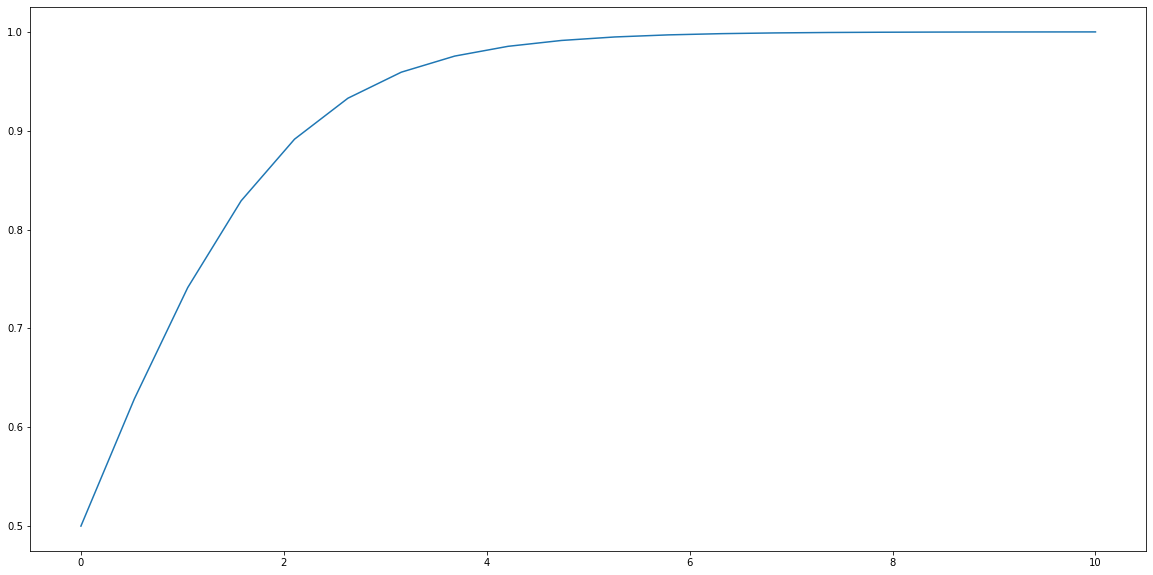

In [13]:
plt.plot(x, 1 / (1 + np.exp(-x))) # zero in on upper half of s-shape curve (no slope, no intercept)

In [14]:
b

array([[1.46709085]])

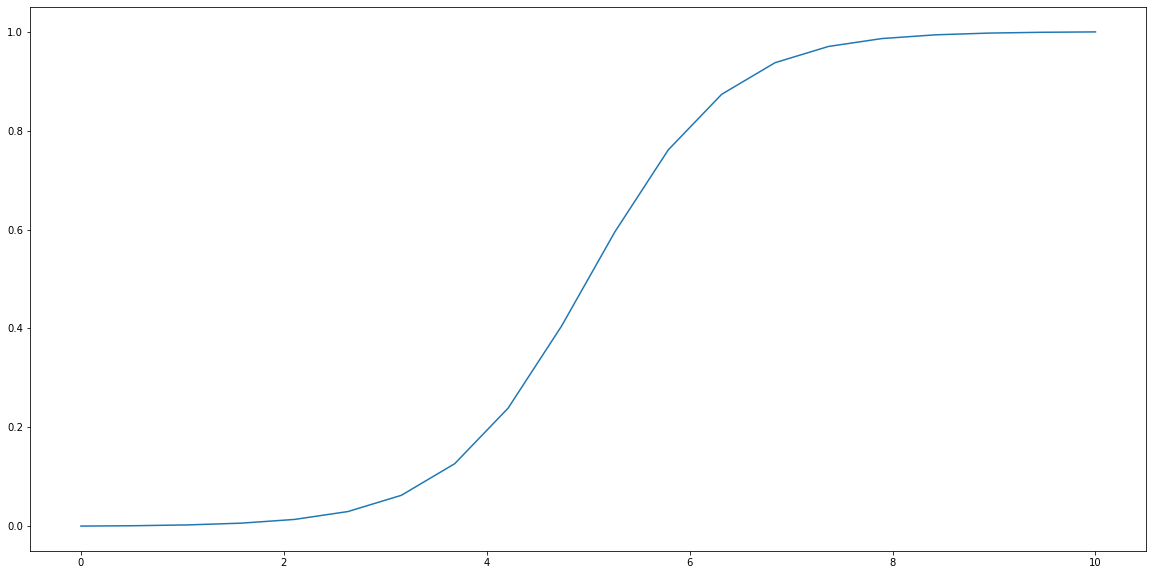

In [15]:
plt.plot(x, 1 / (1 + np.exp(-(b[0] * x + b0))))

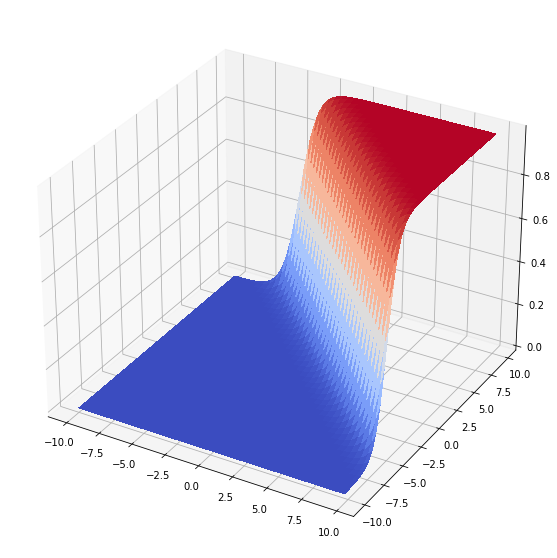

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [12]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [13]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [14]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

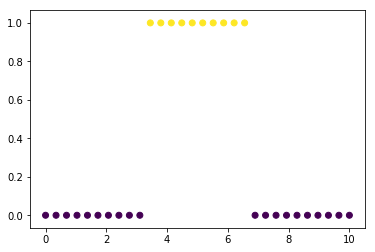

In [15]:
plt.scatter(x,y, c=y)

In [16]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

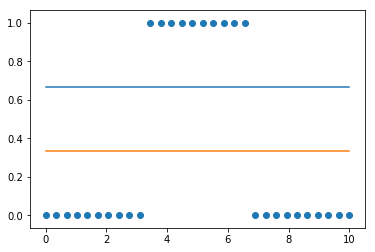

In [17]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [18]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

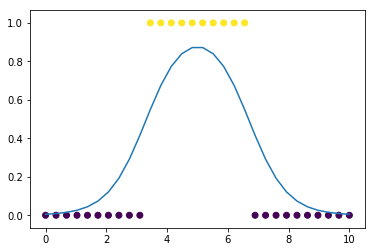

In [20]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [21]:
df = pd.read_csv('../data/adult.data', index_col=False)
golden = pd.read_csv('../data/adult.test', index_col=False)

In [22]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [23]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [24]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [25]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [26]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [27]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [29]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [30]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [31]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [32]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]])

In [33]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [34]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, auc, roc_curve)
from sklearn import preprocessing

## 1. Use your own dataset (create a train and a test set) and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results using `classification_report` and `confusion_matrix`. Which algorithm is superior?

In [22]:
# I chose a dataset from Kaggle that shows University rankings from 2017 to 2022. I want to understand what variable might best 
# predict rank_display

In [109]:
univ = pd.read_csv('university_rankings.csv')
univ.dropna(inplace = True)
univ.head()

rank = pd.read_csv('university_rankings.csv')
rank.dropna(inplace = True)
rank.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [110]:
non_numeric_columns = ['university', 'link', 'logo'] 
transform_columns = ['country', 'city', 'region', 'type', 'research_output', 'size']

In [111]:
enc = preprocessing.OrdinalEncoder()

In [112]:
x = univ.copy()
xt rank.copy()

In [113]:
x[transform_columns] = enc.fit_transform(univ[transform_columns])
x = x.drop(non_numeric_columns, axis = 1)

x['international_students'] = x['international_students'].str.replace(',', '').astype(float)
x['faculty_count'] = x['faculty_count'].str.replace(',', '').astype(float)

x.head()

,year,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,2017,1,100.0,59.0,64.0,4.0,0.0,3.0,4.0,3730.0,1.0,3065.0
1,2017,2,98.7,59.0,336.0,4.0,0.0,3.0,3.0,3879.0,0.0,4725.0
2,2017,3,98.3,59.0,64.0,4.0,0.0,3.0,5.0,5877.0,0.0,4646.0
3,2017,4,97.2,58.0,64.0,2.0,1.0,4.0,4.0,7925.0,0.0,5800.0
4,2017,5,96.9,59.0,283.0,4.0,0.0,3.0,2.0,692.0,2.0,968.0


In [ ]:
xt[transform_columns] = enc.fit_transform(univ[transform_columns])
xt = xt.drop(non_numeric_columns, axis = 1)

xt['international_students'] = xt['international_students'].str.replace(',', '').astype(float)
x['faculty_count'] = xt['faculty_count'].str.replace(',', '').astype(float)

xt.head()

In [114]:
model_lr = LogisticRegression()
model_lr.fit(preprocessing.scale(x.drop('rank_display', axis=1)), x.rank_display)

LogisticRegression()

In [116]:
pred = model_lr.predict(preprocessing.scale(x.drop('rank_display', axis = 1)))
pred_test = model_lr.predict(preprocessing.scale(xt.drop('rank_display', axis = 1)))

In [119]:
print('Accuracy score')
print(accuracy_score(xt.rank_display, pred_test))
print('')
print('Confusion matrix')
print(confusion_matrix(xt.rank_display, pred_test))
print('')
print('Classification report')
print(classification_report(xt.rank_display, pred_test))

Accuracy score
0.11855670103092783

Confusion matrix
[[6 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 2 ... 0 1 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 2 6 0]
 [0 0 0 ... 0 0 0]]

Classification report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
          10       0.00      0.00      0.00         6
         100       0.11      0.25      0.15         8
         101       0.00      0.00      0.00         5
         102       0.50      0.17      0.25         6
         103       0.25      0.33      0.29         3
         104       0.30      0.33      0.32         9
         105       0.00      0.00      0.00         4
         106       0.00      0.00      0.00         7
         107       0.00      0.00      0.00         4
         108       0.00      0.00      0.00         8
         109       0.50      0.29      0.36         7
          11       0.46      0.86      0.60         7
         110       0.00      0.00      0.00    

In [130]:
dt_model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)

In [131]:
dt_model1.fit(x.drop(['rank_display'], axis = 1), x.rank_display)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [132]:
list(zip(x.drop(['rank_display'], axis = 1).columns, dt_model1.feature_importances_))

[('year', 0.0),
 ('score', 1.0),
 ('country', 0.0),
 ('city', 0.0),
 ('region', 0.0),
 ('type', 0.0),
 ('research_output', 0.0),
 ('student_faculty_ratio', 0.0),
 ('international_students', 0.0),
 ('size', 0.0),
 ('faculty_count', 0.0)]

In [133]:
dt_predictions1 = dt_model1.predict(xt.drop(['rank_display'], axis = 1))

In [134]:
print('Accuracy score')
print(accuracy_score(xt.rank_display, dt_predictions1))
print('')
print('Confusion matrix')
print(confusion_matrix(xt.rank_display, dt_predictions1))
print('')
print('Classification report')
print(classification_report(xt.rank_display, dt_predictions1))

Accuracy score
0.009204712812960236

Confusion matrix
[[ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  8  0]
 ...
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  3  0]]

Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         6
         100       0.00      0.00      0.00         8
         101       0.00      0.00      0.00         5
         102       0.00      0.00      0.00         6
         103       0.00      0.00      0.00         3
         104       0.00      0.00      0.00         9
         105       0.00      0.00      0.00         4
         106       0.00      0.00      0.00         7
         107       0.00      0.00      0.00         4
         108       0.00      0.00      0.00         8
         109       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
         1

C:\Users\eabbo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
dt_model3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [136]:
dt_model3.fit(x.drop(['rank_display'], axis = 1), x.rank_display)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [137]:
list(zip(x.drop(['rank_display'], axis = 1).columns, dt_model3.feature_importances_))

[('year', 0.0),
 ('score', 1.0),
 ('country', 0.0),
 ('city', 0.0),
 ('region', 0.0),
 ('type', 0.0),
 ('research_output', 0.0),
 ('student_faculty_ratio', 0.0),
 ('international_students', 0.0),
 ('size', 0.0),
 ('faculty_count', 0.0)]

In [138]:
dt_predictions3 = dt_model3.predict(xt.drop(['rank_display'], axis = 1))

In [139]:
print('Accuracy score')
print(accuracy_score(xt.rank_display, dt_predictions3))
print('')
print('Confusion matrix')
print(confusion_matrix(xt.rank_display, dt_predictions3))
print('')
print('Classification report')
print(classification_report(xt.rank_display, dt_predictions3))

Accuracy score
0.030927835051546393

Confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         6
         100       0.00      0.00      0.00         8
         101       0.00      0.00      0.00         5
         102       0.00      0.00      0.00         6
         103       0.00      0.00      0.00         3
         104       0.00      0.00      0.00         9
         105       0.00      0.00      0.00         4
         106       0.00      0.00      0.00         7
         107       0.00      0.00      0.00         4
         108       0.00      0.00      0.00         8
         109       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
         110       0.00      0.00      0.00   

C:\Users\eabbo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# My logistic regression model outperformed the decision tree model for max depth set at 1 and 3. At this stage, it looks like 
# accuracy increases as I make the decision tree model deeper. Score continues to be the most important predictor
# for shallow depth in the decision tree, while other variables appear to have no importance. 

## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain why it's superior

In [140]:
dt_model30 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30)

In [141]:
dt_model30.fit(x.drop(['rank_display'], axis = 1), x.rank_display)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [142]:
list(zip(x.drop(['rank_display'], axis = 1).columns, dt_model30.feature_importances_))

[('year', 0.1389140121017448),
 ('score', 0.7021943441094047),
 ('country', 0.023284601328883443),
 ('city', 0.03293278435419166),
 ('region', 0.011426951040281656),
 ('type', 0.0021256342817617233),
 ('research_output', 0.0007801415660212674),
 ('student_faculty_ratio', 0.01986670546280327),
 ('international_students', 0.032754591011103444),
 ('size', 0.011484533387219017),
 ('faculty_count', 0.02423570135658506)]

In [143]:
dt_predictions30 = dt_model30.predict(xt.drop(['rank_display'], axis = 1))

In [144]:
print('Accuracy score')
print(accuracy_score(xt.rank_display, dt_predictions30))
print('')
print('Confusion matrix')
print(confusion_matrix(xt.rank_display, dt_predictions30))
print('')
print('Classification report')
print(classification_report(xt.rank_display, dt_predictions30))

Accuracy score
1.0

Confusion matrix
[[ 6  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  0  3]]

Classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         6
         100       1.00      1.00      1.00         8
         101       1.00      1.00      1.00         5
         102       1.00      1.00      1.00         6
         103       1.00      1.00      1.00         3
         104       1.00      1.00      1.00         9
         105       1.00      1.00      1.00         4
         106       1.00      1.00      1.00         7
         107       1.00      1.00      1.00         4
         108       1.00      1.00      1.00         8
         109       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
         110       1.00    

In [ ]:
# After overfitting the decision tree, it has an accuracy score of 100% in predicting school ranking and out-performes the
# logistic regression model. It's also interesting how this diversifies the importance of other variables in the model compared
# to the shallower decision tree models. However, although accuracy is higher, we know this introduces bias into the overfitted
# model and, therefore, is not necessarily the best model for this dataset.